In [31]:
import os
import sys
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import logging


In [32]:
# Add src/ directory to Python path
sys.path.append(os.path.abspath('../src'))

In [33]:
# Define the data directory
DATA_DIR = '../data/'

In [34]:
# File paths
LISTING_TITLES_FILE = os.path.join(DATA_DIR, 'Listing_Titles.tsv.gz')
TAGGED_TITLES_FILE = os.path.join(DATA_DIR, 'Train_Tagged_Titles.tsv.gz')

In [35]:
import data_loading
importlib.reload(data_loading)
from data_loading import load_listing_titles, load_tagged_titles

In [36]:
listing_titles_df = load_listing_titles(LISTING_TITLES_FILE)

Loading Listing Titles...
Listing Titles loaded. Shape: (9991682, 2)


In [37]:
print("\nFirst 10 rows of Listing Titles:")
listing_titles_df.head(10)


First 10 rows of Listing Titles:


,Record Number,Title
0,1,Supreme Nike SB Dunk High By any Means Red US1...
1,2,New Balance 530 Männer und Frauen Laufschuhe m...
2,3,♥ MICHAEL KORS Sneaker Gr 39 ♥
3,4,New Balance ML 574 EGO Turnschuhe grün
4,5,"Nike air jordan 9 og , space jam , hare , bugs..."
5,6,NEU SKECHERS Damen Sneakers Turnschuhe Memory ...
6,7,New Balance 550 White Green
7,8,CAT CATERPILLAR Arise Sneaker Freizeitschuhe T...
8,9,Adidas NMD R1 STLT PK Primeknit Sneaker Turnsc...
9,10,Damen Sneaker Mesh Sportschuhe Laufschuhe Slip...


In [38]:
tagged_titles_df = load_tagged_titles(TAGGED_TITLES_FILE)

Loading Train Tagged Titles...
Train Tagged Titles loaded. Shape: (47158, 4)


In [39]:
print("\nFirst 30 rows of Tagged Titles:")
tagged_titles_df.head(30)


First 30 rows of Tagged Titles:


,Record Number,Title,Token,Tag
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke
2,1,Supreme Nike SB Dunk High By any Means Red US1...,SB,Produktlinie
3,1,Supreme Nike SB Dunk High By any Means Red US1...,Dunk,NaN
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ
5,1,Supreme Nike SB Dunk High By any Means Red US1...,By,Modell
6,1,Supreme Nike SB Dunk High By any Means Red US1...,any,NaN
7,1,Supreme Nike SB Dunk High By any Means Red US1...,Means,NaN
8,1,Supreme Nike SB Dunk High By any Means Red US1...,Red,Farbe
9,1,Supreme Nike SB Dunk High By any Means Red US1...,US10,US-Schuhgröße


In [40]:
listing_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991682 entries, 0 to 9991681
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Record Number  int64 
 1   Title          object
dtypes: int64(1), object(1)
memory usage: 152.5+ MB


In [41]:
print("\nChecking for missing values in Listing Titles:")
listing_titles_df.isnull().sum()


Checking for missing values in Listing Titles:


Record Number    0
Title            0
dtype: int64

In [42]:
tagged_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47158 entries, 0 to 47157
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Record Number  47158 non-null  int64 
 1   Title          47158 non-null  object
 2   Token          47157 non-null  object
 3   Tag            38214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [43]:
print("\nChecking for missing values in Tagged Titles:")
tagged_titles_df.isnull().sum()


Checking for missing values in Tagged Titles:


Record Number       0
Title               0
Token               1
Tag              8944
dtype: int64

In [44]:
print(f"\nTotal unique listings in Listing Titles: {listing_titles_df['Record Number'].nunique()}")
print(f"Total unique listings in Train Tagged Titles: {tagged_titles_df['Record Number'].nunique()}")


Total unique listings in Listing Titles: 9991682
Total unique listings in Train Tagged Titles: 4295


In [45]:
sample_record_num = 11
sample_listing = tagged_titles_df[tagged_titles_df['Record Number'] == sample_record_num]
print(f"\nSample Listing with Record Number {sample_record_num}:")
sample_listing


Sample Listing with Record Number 11:


,Record Number,Title,Token,Tag
116,11,Art 505 Schuhe Sneaker Sportschuhe Herren,Art,Modell
117,11,Art 505 Schuhe Sneaker Sportschuhe Herren,505,NaN
118,11,Art 505 Schuhe Sneaker Sportschuhe Herren,Schuhe,Produktart
119,11,Art 505 Schuhe Sneaker Sportschuhe Herren,Sneaker,Stil
120,11,Art 505 Schuhe Sneaker Sportschuhe Herren,Sportschuhe,Produktart
121,11,Art 505 Schuhe Sneaker Sportschuhe Herren,Herren,Abteilung


In [46]:
import utilities
importlib.reload(utilities)
from utilities import plot_countplot , fix_aspect_values, prepare_data , convert_to_iob

In [47]:
tagged_titles_df_final = fix_aspect_values(tagged_titles_df)
tagged_titles_df_final.head(20)

,Record Number,Title,Aspect Value,Aspect Name
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke
2,1,Supreme Nike SB Dunk High By any Means Red US1...,SB Dunk,Produktlinie
3,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ
4,1,Supreme Nike SB Dunk High By any Means Red US1...,By any Means,Modell
5,1,Supreme Nike SB Dunk High By any Means Red US1...,Red,Farbe
6,1,Supreme Nike SB Dunk High By any Means Red US1...,US10,US-Schuhgröße
7,1,Supreme Nike SB Dunk High By any Means Red US1...,EU44,EU-Schuhgröße
8,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,No Tag
9,1,Supreme Nike SB Dunk High By any Means Red US1...,Box,No Tag


In [48]:
tagged_titles_df_final.isnull().sum()

Record Number    0
Title            0
Aspect Value     1
Aspect Name      0
dtype: int64

In [49]:
nan_index = int(tagged_titles_df_final[tagged_titles_df_final.isnull().any(axis=1)].index[0])
print(nan_index)
print(tagged_titles_df_final['Title'][nan_index] , tagged_titles_df_final['Aspect Value'][nan_index])
tagged_titles_df_final.loc[nan_index, 'Aspect Value'] = 'None'
print(tagged_titles_df_final['Aspect Value'][nan_index])

12228
Nike SB Dunk Low Heineken ( 2003 ) - EU44 US10 - OG None - Used nan
None


In [50]:
tagged_titles_df_final = tagged_titles_df_final.drop(['Title'],axis=1)
tagged_titles_df_final.head(20)

,Record Number,Aspect Value,Aspect Name
0,1,Supreme,Modell
1,1,Nike,Marke
2,1,SB Dunk,Produktlinie
3,1,High,Schuhschaft-Typ
4,1,By any Means,Modell
5,1,Red,Farbe
6,1,US10,US-Schuhgröße
7,1,EU44,EU-Schuhgröße
8,1,Supreme,No Tag
9,1,Box,No Tag


In [51]:
# Apply the conversion
tagged_titles_df_final['Aspect Name'] = convert_to_iob(tagged_titles_df_final)
tagged_titles_df_final.head(30)


,Record Number,Aspect Value,Aspect Name
0,1,Supreme,B-Modell
1,1,Nike,B-Marke
2,1,SB Dunk,B-Produktlinie
3,1,High,B-Schuhschaft-Typ
4,1,By any Means,B-Modell
5,1,Red,B-Farbe
6,1,US10,B-US-Schuhgröße
7,1,EU44,B-EU-Schuhgröße
8,1,Supreme,B-No Tag
9,1,Box,I-No Tag


In [52]:
print("\nTag Distribution:")
tag_counts = tagged_titles_df_final['Aspect Name'].value_counts(dropna=False)
print(tag_counts)


Tag Distribution:
Aspect Name
B-No Tag                          5792
B-Marke                           3909
B-Produktart                      3748
B-Modell                          3479
B-Abteilung                       2979
B-Stil                            2849
B-Farbe                           2815
I-No Tag                          2792
B-Herstellernummer                1929
B-Produktlinie                    1868
B-EU-Schuhgröße                   1533
B-Obermaterial                     670
B-Schuhschaft-Typ                  622
B-Anlass                           543
B-Aktivität                        496
B-Besonderheiten                   316
B-Verschluss                       293
B-US-Schuhgröße                    282
B-UK-Schuhgröße                    226
B-Gewebeart                        170
B-Thema                            148
B-Akzente                           86
B-Erscheinungsjahr                  69
B-Obscure                           69
B-Muster                         

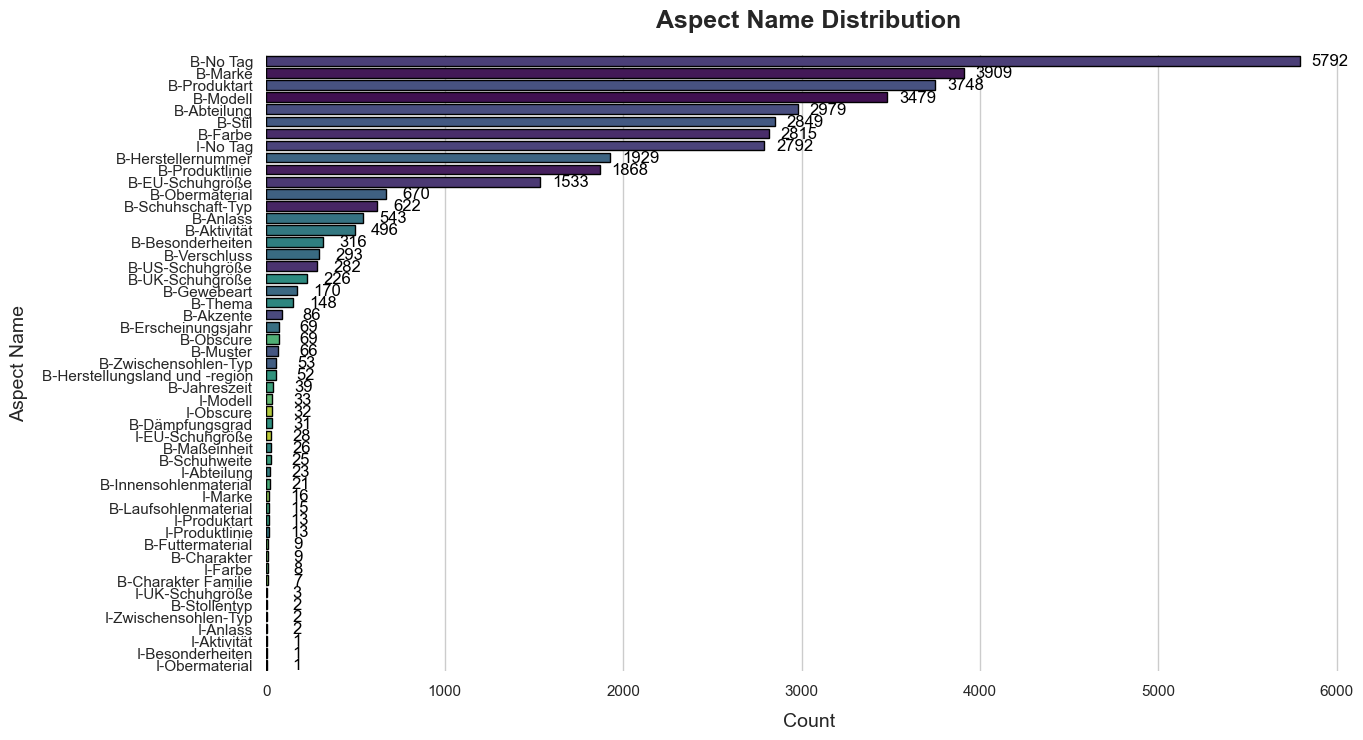

In [53]:
plot_countplot(tagged_titles_df_final) # Plot the tag distribution

In [54]:
tagged_titles_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38214 entries, 0 to 38213
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Record Number  38214 non-null  int64 
 1   Aspect Value   38214 non-null  object
 2   Aspect Name    38214 non-null  object
dtypes: int64(1), object(2)
memory usage: 895.8+ KB


In [55]:
# Save the DataFrame to a CSV file
tagged_titles_df_final.to_csv(os.path.join(DATA_DIR,'tagged_titles_df_final.csv'), index=False)

print("DataFrame successfully saved to 'tagged_titles_df_final.csv'")

DataFrame successfully saved to 'tagged_titles_df_final.csv'
